Import Libraries and Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dt = pd.read_csv('Flood.csv')
dt

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


Split dataset into independent and dependent variables

In [2]:
x = dt.iloc[:,:-1].values
y = dt.iloc[:,15].values

In [3]:
x

array([['KERALA', 1901, 28.7, ..., 350.8, 48.4, 3248.6],
       ['KERALA', 1902, 6.7, ..., 158.3, 121.5, 3326.6],
       ['KERALA', 1903, 3.2, ..., 157.0, 59.0, 3271.2],
       ...,
       ['KERALA', 2016, 2.4, ..., 125.4, 23.6, 2176.6],
       ['KERALA ', 2017, 1.9, ..., 92.5, 38.1, 2117.1],
       ['KERALA', 2018, 29.1, ..., 125.4, 65.1, 4473.0]], dtype=object)

In [4]:
y

array(['YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
x[:,0]=LabelEncoder().fit_transform(x[:,0])
y = LabelEncoder().fit_transform(y)
x

array([[0, 1901, 28.7, ..., 350.8, 48.4, 3248.6],
       [0, 1902, 6.7, ..., 158.3, 121.5, 3326.6],
       [0, 1903, 3.2, ..., 157.0, 59.0, 3271.2],
       ...,
       [0, 2016, 2.4, ..., 125.4, 23.6, 2176.6],
       [1, 2017, 1.9, ..., 92.5, 38.1, 2117.1],
       [0, 2018, 29.1, ..., 125.4, 65.1, 4473.0]], dtype=object)

Split dataset into Training and Testing

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(82, 15)
(36, 15)
(82,)
(36,)


In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve,auc

# Create a Logistic Regression model
classifier = LogisticRegression(random_state=0)

# Train the model on the training data
classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluate the model
lr_acc = accuracy_score(y_test, y_pred)*100
lr_cm = confusion_matrix(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)*100
lr_pre = precision_score(y_test, y_pred)*100
lr_recall = recall_score(y_test, y_pred)*100


# Print the results
print("Accuracy:", lr_acc)
print("F1_Score:", lr_f1)
print("Precision:", lr_pre)
print("Recall_Score:", lr_recall)
print("\nConfusion Matrix:\n", lr_cm)

Accuracy: 94.44444444444444
F1_Score: 93.75
Precision: 88.23529411764706
Recall_Score: 100.0

Confusion Matrix:
 [[19  2]
 [ 0 15]]


<Axes: >

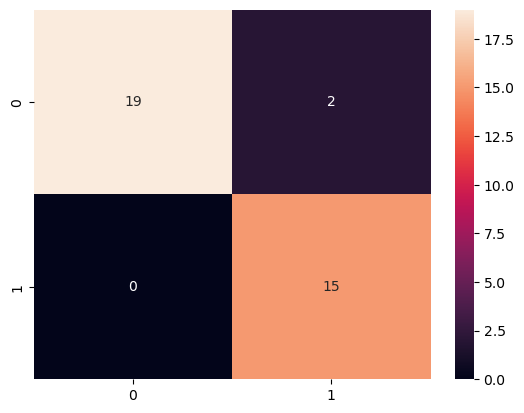

In [9]:
import seaborn as sns
sns.heatmap(lr_cm,annot=True)

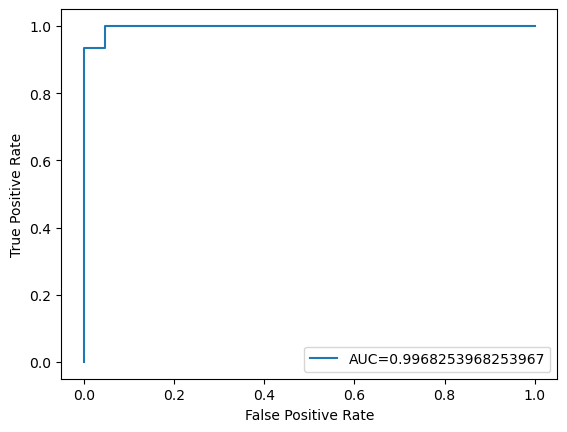

In [45]:
from sklearn import metrics
y_pred_proba=classifier.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=10)
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

In [11]:
dt_recall=recall_score(y_test,y_pred)*100
dt_acc=accuracy_score(y_test,y_pred)*100
dt_f1=f1_score(y_test,y_pred)*100
dt_pre=precision_score(y_test,y_pred)*100

print(dt_acc)
print(dt_f1)
print(dt_pre)
print(dt_recall)

100.0
100.0
100.0
100.0


<Axes: >

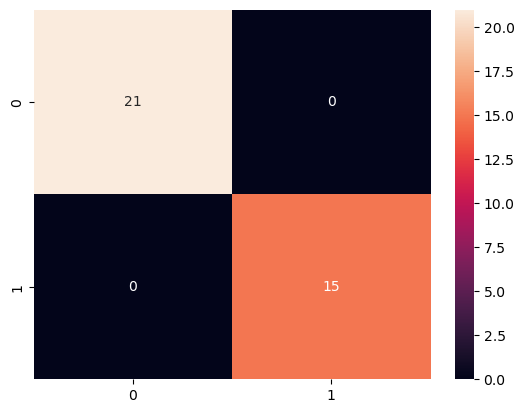

In [12]:
conf_matrix_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_dt,annot=True)

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn import tree
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded = True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_ise.png')

True

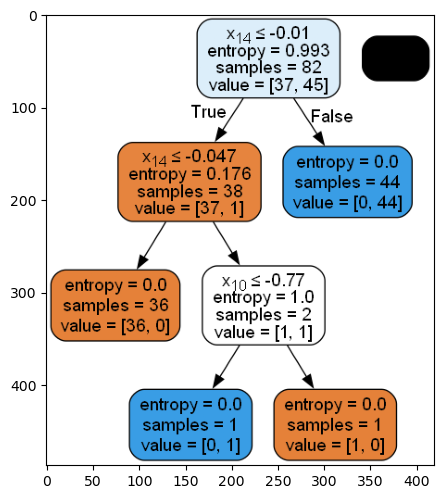

In [40]:
img=plt.imread('tree_ise.png')
plt.figure(figsize=(5,10))
plt.imshow(img)

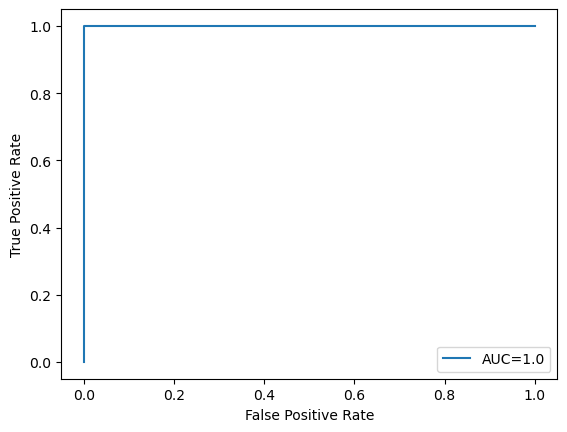

In [46]:
y_pred_proba=dt.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Random Forest

In [13]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
clf.fit(x_train, y_train)
y_predrf= clf.predict(x_test)

In [14]:
rf_recall=recall_score(y_test,y_predrf)*100
rf_acc=accuracy_score(y_test,y_predrf)*100
rf_f1=f1_score(y_test,y_predrf)*100
rf_pre=precision_score(y_test,y_predrf)*100

print(rf_acc)
print(rf_f1)
print(rf_pre)
print(rf_recall)

100.0
100.0
100.0
100.0


<Axes: >

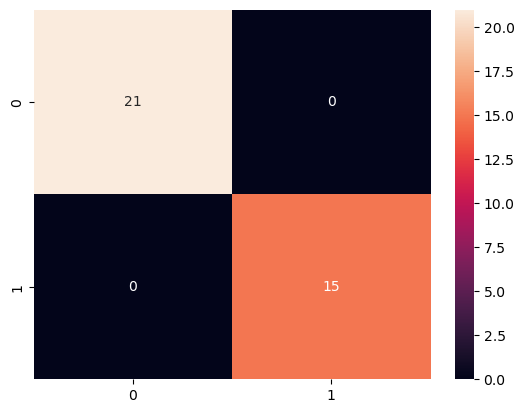

In [15]:
conf_matrix_rf = confusion_matrix(y_test, y_predrf)
sns.heatmap(conf_matrix_rf,annot=True)

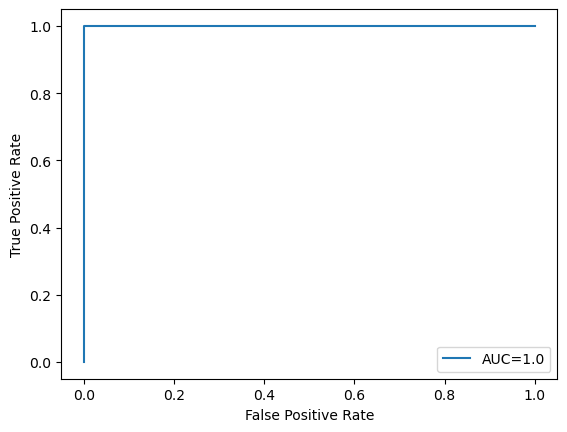

In [47]:
y_pred_proba=clf.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

SVM

In [16]:
from sklearn.svm import SVC

# Create a Support Vector Machine model
svm_model = SVC(probability=True,kernel='linear', random_state=0)  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Train the model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_predsvm = svm_model.predict(x_test)

In [17]:
svm_recall=recall_score(y_test,y_predsvm)*100
svm_acc=accuracy_score(y_test,y_predsvm)*100
svm_f1=f1_score(y_test,y_predsvm)*100
svm_pre=precision_score(y_test,y_predsvm)*100

print(svm_acc)
print(svm_f1)
print(svm_pre)
print(svm_recall)

94.44444444444444
92.85714285714286
100.0
86.66666666666667


[[21  0]
 [ 2 13]]


<Axes: >

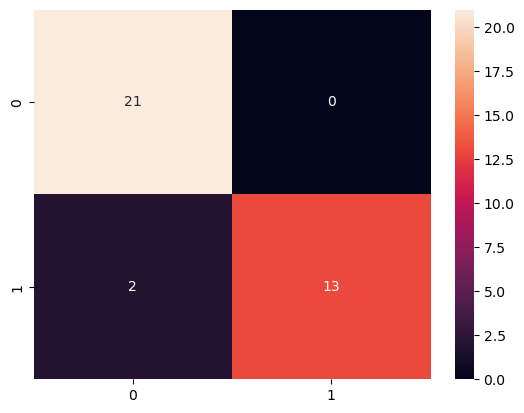

In [18]:
conf_matrix_svm = confusion_matrix(y_test, y_predsvm)
print(conf_matrix_svm)
sns.heatmap(conf_matrix_svm,annot=True)

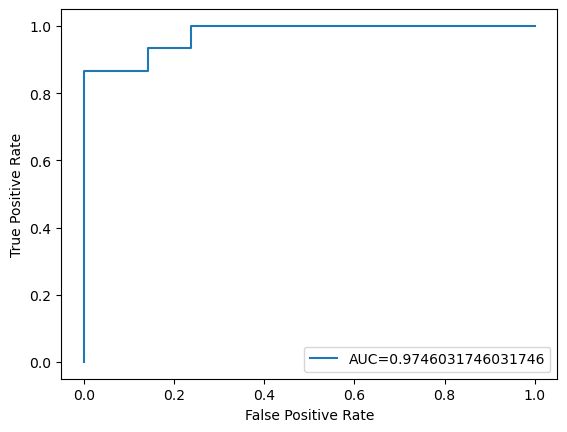

In [48]:
y_pred_proba=svm_model.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_predknn = knn_model.predict(x_test)

In [20]:
knn_recall=recall_score(y_test,y_predknn)*100
knn_acc=accuracy_score(y_test,y_predknn)*100
knn_f1=f1_score(y_test,y_predknn)*100
knn_pre=precision_score(y_test,y_predknn)*100

print(knn_acc)
print(knn_f1)
print(knn_pre)
print(knn_recall)

86.11111111111111
84.84848484848484
77.77777777777779
93.33333333333333


<Axes: >

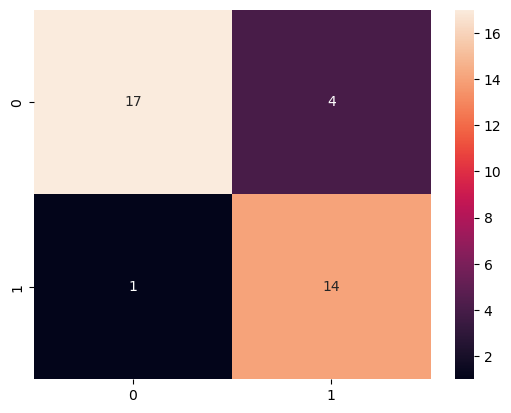

In [21]:
conf_matrix_knn = confusion_matrix(y_test, y_predknn)
sns.heatmap(conf_matrix_knn,annot=True)

Comparison

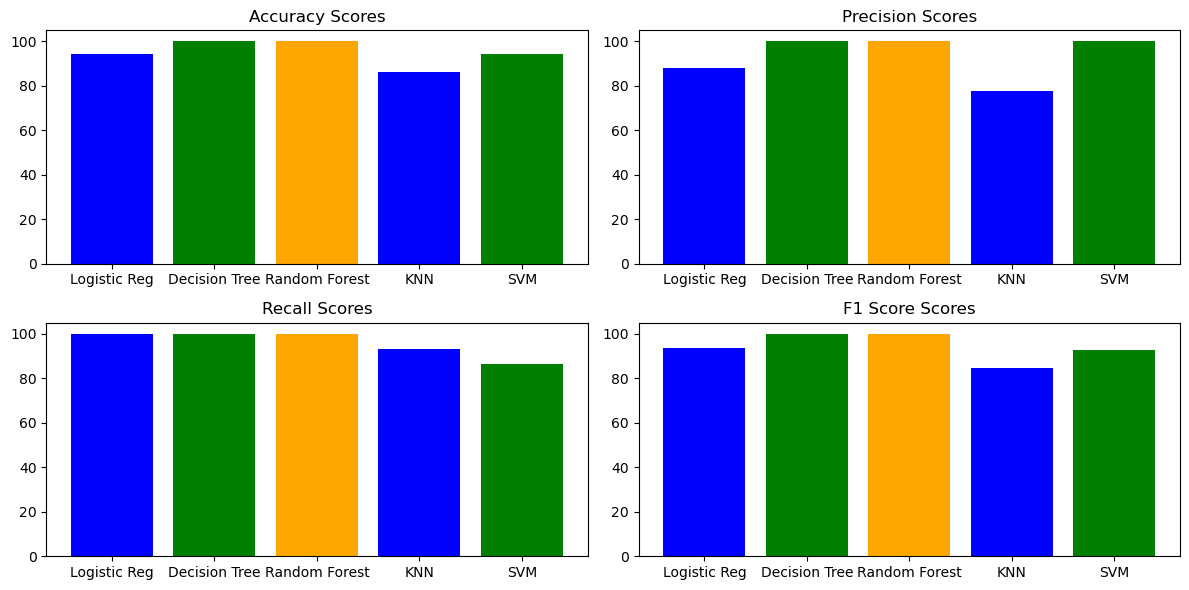

In [31]:
import matplotlib.pyplot as plt

# Replace these values with your actual scores
accuracy_scores = [lr_acc, dt_acc, rf_acc ,knn_acc ,svm_acc]
precision_scores = [lr_pre, dt_pre, rf_pre ,knn_pre ,svm_pre]
recall_scores = [lr_recall, dt_recall, rf_recall ,knn_recall ,svm_recall]
f1_scores = [lr_f1 ,dt_f1, rf_f1 ,knn_f1 ,svm_f1]

algorithms = ['Logistic Reg','Decision Tree', 'Random Forest', 'KNN', 'SVM']

# Bar graphs for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.bar(algorithms, scores[i], color=['blue', 'green', 'orange'])
    plt.title(f'{metric} Scores')

plt.tight_layout()
plt.show()